In [ ]:
!pip install -qU diffusers accelerate transformers huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.7/450.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# Text-to-Image

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    torch_dtype=torch.float16,
    variant='fp16',
).to('cuda')

  0%|          | 0/50 [00:00<?, ?it/s]

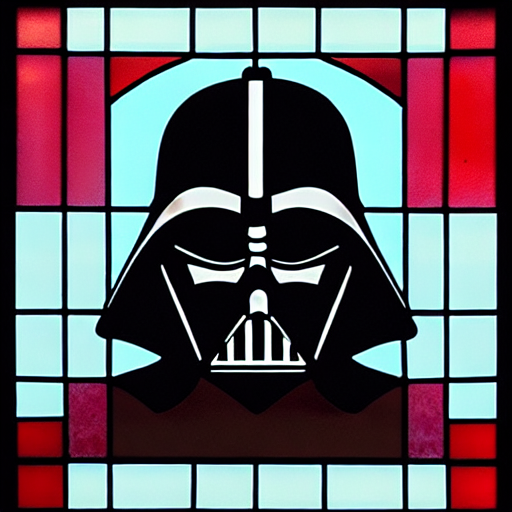

In [ ]:
image = pipeline(
    'stained glass of darth vader, backlight, centered composition, masterpiece, photorealistic, 8k'
).images[0]
image

## Popular models

### Stable Diffusion v1.5

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    torch_dtype=torch.float16,
    variant='fp16'
).to('cuda')
generator = torch.Generator('cuda').manual_seed(111)

In [ ]:
image = pipeline(
    'Astronaut in a jungle, cold color palette, muted colors, detailed, 8k',
    generator=generator
).images[0]
image

### Stable Diffusion XL

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stabilityai/stable-diffusion-xl-base-1.0',
    torch_dtype=torch.float16,
    variant='fp16'
).to('cuda')
generator = torch.Generator('cuda').manual_seed(111)

In [ ]:
image = pipeline(
    'Astronaut in a jungle, cold color palette, muted colors, detailed, 8k',
    generator=generator
).images[0]
image

### Kandinsky 2.2

The Kandinsky model also uses an image prior model to create embeddings that are used to better align text and images in the diffusion model.

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'kandinsky-community/kandinsky-2-2-decoder',
    torch_dtype=torch.float16,
).to('cuda')
generator = torch.Generator('cuda').manual_seed(111)

In [ ]:
image = pipeline(
    'Astronaut in a jungle, cold color palette, muted colors, detailed, 8k',
    generator=generator
).images[0]
image

### ControlNet
ControlNet models are auxiliary models or adapters that are finetuned on top of text-to-image models.

Using ControlNet models in combination with text-to-image models offers diverse options for more explicit control over how to generate an image. With ControlNet, we add an additional conditioning input image to the model.

In [ ]:
from diffusers import ControlNetModel, AutoPipelineForText2Image
from diffusers.utils import load_image
import torch

controlnet = ControlNetModel.from_pretrained(
    'llyasviel/control_v11p_sd15_openpose',
    torch_dtype=torch.float16,
    variant='fp16',
).to('cuda')

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    controlnet=controlnet,
    torch_dtype=torch.float16,
    variant='fp16',
).to('cuda')

In [ ]:
pose_image = load_image("https://huggingface.co/lllyasviel/control_v11p_sd15_openpose/resolve/main/images/control.png")
generator = torch.Generator('cuda').manual_seed(111)

image = pipeline(
    'Astronaut in a jungle, cold color palette, muted colors, detailed, 8k',
    image=pose_image,
    generator=generator,
).images[0]
image

## Configure pipeline parameters

### Height and width

Default output size of the Stable Diffusion v1.5 is 512x512, and we can change this to any size that is a multiple of 8.

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    torch_dtype=torch.float16,
    variant='fp16',
).to('cuda')

In [ ]:
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    height=768,
    width=512,
).images[0]
image

Default image size of SDXL is 1024x1024 and using lower `height` and `width` values may result in lower quality images.

### Guidance scale

The `guidance_scale` parameter affects how much the prompt influences image generation.
* A lower value gives the model "creativity" to generate images that are more loosely related to the prompt.
* Higher `guidance_scale` values push the model to follow the prompt more closely, and if this value is too high, we may observe some artifacts in the generated images.

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    torch_dtype=torch.float16,
    variant='fp16',
).to('cuda')

In [ ]:
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    guidance_scale=3.5,
).images[0]
image

In [ ]:
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    guidance_scale=7.5,
).images[0]
image

In [ ]:
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    guidance_scale=10.5,
).images[0]
image

### Negative prompt

A **negative prompt** steers the mdoel away from things we do not want the model to genreate. This is commonly used to improve overall image quality by removing poor or bad image features such as “low resolution” or “bad details”.

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    torch_dtype=torch.float16,
    variant='fp16',
).to('cuda')

In [ ]:
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    negative_prompt='ugly, deformed, disfigured, poor details, bad anatomy',
).images[0]
image

### Generator

A `torch.Generator` object enables reproducibility in a pipeline by setting a manual seed.

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    torch_dtype=torch.float16,
    variant='fp16',
).to('cuda')

In [ ]:
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    generator=torch.Generator('cuda').manual_seed(111),
).images[0]
image

## Control image generation

### Prompt weighting

**Prompt weighting** is a technique for increasing or decreasing the importance of concepts in a prompt to emphasize or minimize certain features in an image. The [Compel](https://github.com/damian0815/compel) library can be used to generate the weighted prompt embeddings.

In [ ]:
!pip install -qU compel

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    torch_dtype=torch.float16,
    variant='fp16',
).to('cuda')

In [ ]:
 from compel import Compel

 compel = Compel(
     tokenizer=pipeline.tokenizer,
     text_encoder=pipeline.text_encoder,
 )

 prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
 negative_prompt = 'ugly, deformed, disfigured, poor details, bad anatomy'

 prompt_embed = compel.build_conditioning_tensor(prompt)
 negative_prompt_embed = compel.build_conditioning_tensor(negative_prompt)

In [ ]:
image = pipeline(
	prompt_embeds=prompt_embeds, # generated from Compel
	negative_prompt_embeds=negative_prompt_embeds, # generated from Compel
).images[0]

### ControlNet

Each ControlNet model is pretrained on a particular type of conditioning image to generate new images that resemble it. We can even combine multiple conditioning inputs with a `MultiControlNet`.

## Optimize

There are many optimization techniques for running diffusion models on consumer and free-tier resources. For example, we can load model weights in half-precision to save GPU memory and increase speed or offload the entire model to the GPU to save even more memory.

PyTorch 2.0 also supports a more memory-efficient attention mechansim called `scaled_dot_product_attention`.

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    torch_dtype=torch.float16,
    variant='fp16',
).to('cuda')

In [ ]:
pipeline.unet = torch.compile(
    pipeline.unet,
    mode='reduce-overhead',
    fullgraph=True,
)